In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df=pd.read_csv("weight-height.csv")
df

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796
...,...,...
9995,136.777454,66.172652
9996,170.867906,67.067155
9997,128.475319,63.867992
9998,163.852461,69.034243


In [10]:
df.head()

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796


In [11]:
## we are going to apply simple linaer regression and we will apply sklearn
#weight as input height as output


In [13]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'height')

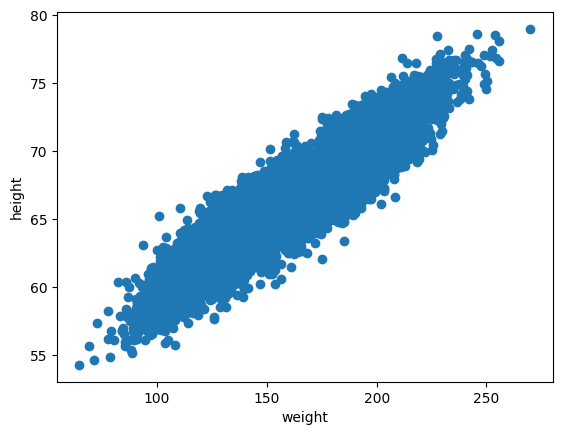

In [15]:
##scatter plot
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")


In [16]:
#finding whether the relation is positive or negative correaltiin
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


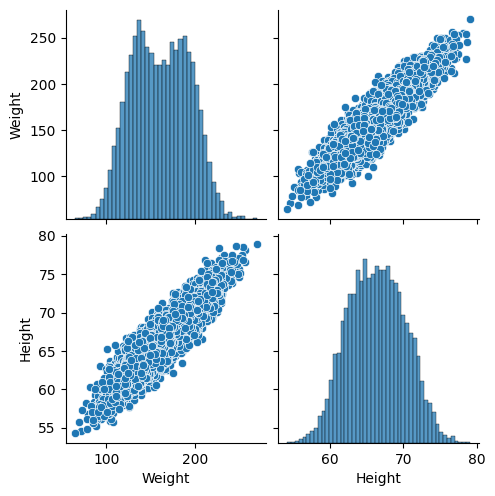

In [17]:
##seaborn for visualization
sns.pairplot(df)

In [18]:
##step 1
## independent and depaendent feature
df.head()

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796


In [31]:
X=df[["Weight"]]## independent feautre should be data frame or a 2d array only
y=df['Height']##DEPENDENT FEATURE SHOULD BE 1D we can use that or series
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [29]:
X_series=df["Weight"]## independent feautre should be data frame or a 2d array only
X_series.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [32]:
##train test split as for the purpose of overfitting and under fitting
from sklearn.model_selection import train_test_split


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
##standradization ->making all the different units in same unit for the global minima purpose-->z-score u=0 sd =1
from sklearn.preprocessing import StandardScaler
#we will standrazdize the inptut feauture

In [38]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)

In [39]:
X_test=scalar.transform(X_test)

In [40]:
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]], shape=(2500, 1))

In [45]:
## apply simple  linear regression
from sklearn.linear_model import LinearRegression

In [48]:
regression=LinearRegression(n_jobs=-1)

In [49]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [51]:
regression.coef_

array([3.5520765])

In [52]:
regression.intercept_

np.float64(66.34834766153067)

In [54]:
print("coeffienct or slope",regression.coef_)
print("intercept",regression.intercept_)

coeffienct or slope [3.5520765]
intercept 66.34834766153067


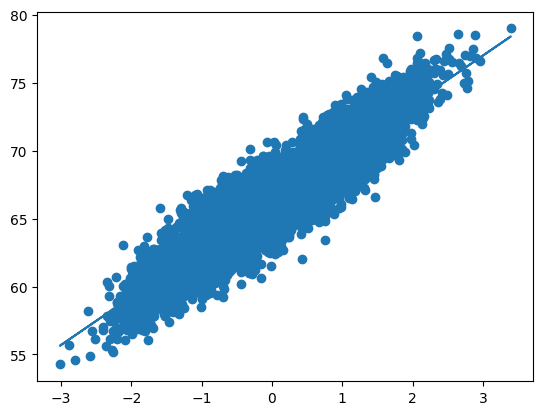

In [ ]:
##plot the training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [60]:
##prediction for the test data
#y_predict=intercept+slope*x_Test
y_predict=regression.predict(X_test)

In [61]:
###performaance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [65]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

In [66]:
print(mse)
print(mae)
print(rmse)

2.1245002936077957
1.1618686242313918
1.4575665657553332


In [67]:
##r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [73]:
score=r2_score(y_test,y_predict)
print(score)

0.8574288810712688


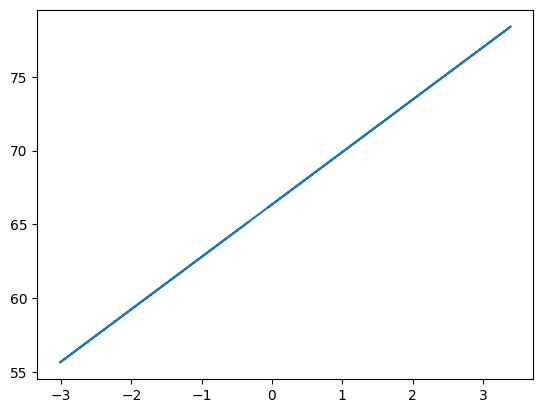

In [72]:
plt.plot(X_train,regression.predict(X_train))

In [74]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8573718069644118

In [77]:
## lets do with ols regeraaion
import statsmodels.api as sm

In [81]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Sat, 11 Jan 2025   Prob (F-statistic):                    3.63e-06
Time:                        11:56:11   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
## prediction for new data
regression.predict([[72]])
#we get error her as our entered value was not standradized so we have to use scalr atranfrom

array([322.09785593])

In [84]:
regression.predict(scalar.transform([[72]]))

c:\Users\b12b3\Desktop\ML\ML-Projects\Environments\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45016021])